# Tech Survey Data Analysis

### Objective: Determine the number of jobs currently open for various technologies and for various locations

In [1]:
import pandas as pd
import json
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
data = requests.get(url).json()
df = pd.DataFrame(data=data)
df

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...
27000,29995,MTS-Software-Engineer,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Detroit,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27001,29996,Client Relationship Manager,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Detroit,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27002,29997,Assoc. Prof.- CS,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Detroit,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27003,29998,Application/Cyber Security Specialist-New Jersey,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Detroit,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


#### Write a function to get the number of jobs for the Python technology.

In [2]:
def get_number_of_jobs_T(technology):
    key_skills_df = df[df['Key Skills'].str.contains(technology)==True]
    
    number_of_jobs = len(key_skills_df)
    
    return technology,number_of_jobs

get_number_of_jobs_T("Python")

('Python', 1173)

#### Write a function to find number of jobs in US for a location of your choice

In [3]:
def get_number_of_jobs_L(location):
    location_df = df[df['Location'].str.contains(location)==True]
    number_of_jobs = len(location_df)
    return location,number_of_jobs

get_number_of_jobs_L('Los Angeles')

('Los Angeles', 640)

#### Find the Location which has had the most number of job postings.

In [4]:
L= ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle"]
max_jobs = 0
max_jobs_location= ""
for location in L:
    check_location,check_jobs = get_number_of_jobs_L(location)
    if check_jobs > max_jobs:
        max_job_location = check_location
        max_jobs = check_jobs
max_job_location

'Washington DC'

Collect the number of job postings for the following languages using the API:
- C
- C++
- C#
- Java
- Javascript
- Python
- Scala
- Oracle
- MS SQL Server
- Postgres SQL
- MySQL Server
- MongoDB

In [5]:
technologies_list = ['C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']
popular_tech_jobs= []
for item in technologies_list:
    tech,jobs = get_number_of_jobs_T(item)
    popular_tech_jobs.append({'Language': tech, 'No. of Job Postings': jobs})
popular_jobs_df = pd.DataFrame(data=popular_tech_jobs,columns=['Language','No. of Job Postings'])
popular_jobs_df

,Language,No. of Job Postings
0,C,13498
1,C#,333
2,C++,13498
3,Java,2609
4,JavaScript,355
5,Python,1173
6,Scala,33
7,Oracle,784
8,SQL Server,250
9,MySQL Server,0


#### Create a bar chart showing Number of Job Postings by the Programming Language

[Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '33'),
 Text(0, 0, '174'),
 Text(0, 0, '250'),
 Text(0, 0, '333'),
 Text(0, 0, '355'),
 Text(0, 0, '784'),
 Text(0, 0, '1173'),
 Text(0, 0, '2609'),
 Text(0, 0, '13498'),
 Text(0, 0, '13498')]

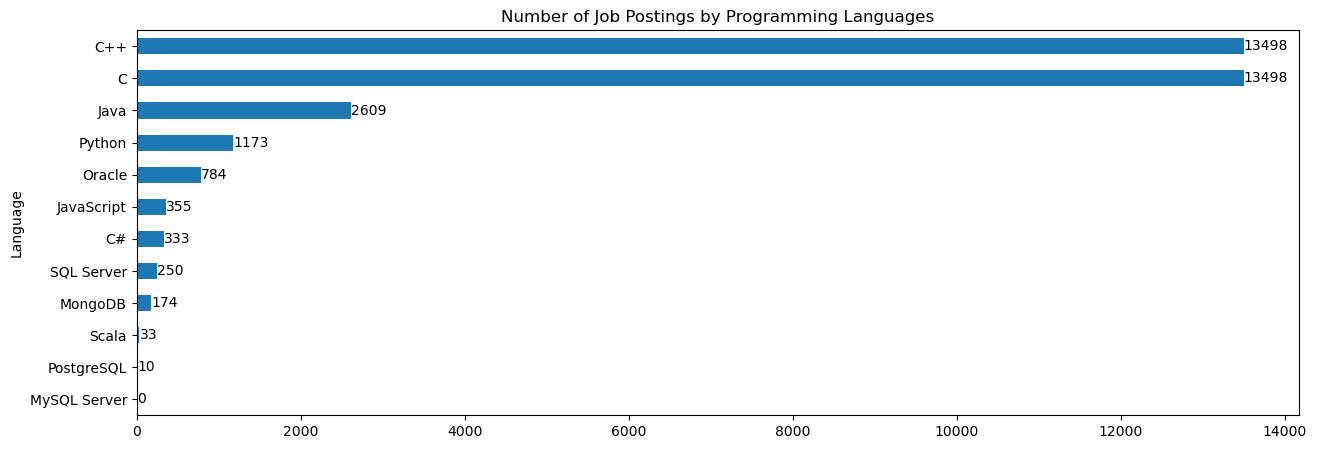

In [6]:
popular_jobs_df.sort_values('No. of Job Postings',inplace=True)
ax = popular_jobs_df.plot.barh(y='No. of Job Postings',x='Language',legend=False,figsize=[15,5],title='Number of Job Postings by Programming Languages')
ax.bar_label(ax.containers[0])

#### Create a bar chart showing Number of Job Postings by the Location

In [7]:
total_cities = df['Location'].value_counts()
total_cities_df = total_cities.to_frame().reset_index()
total_cities_df

,Location,count
0,Washington DC,5316
1,Detroit,3945
2,Seattle,3375
3,Houston,3339
4,New York,3226
5,Boston,2966
6,Baltimore,1263
7,Dallas,1208
8,New Orleons,817
9,Los Angeles,640


[Text(0, 0, '5316'),
 Text(0, 0, '3945'),
 Text(0, 0, '3375'),
 Text(0, 0, '3339'),
 Text(0, 0, '3226'),
 Text(0, 0, '2966'),
 Text(0, 0, '1263'),
 Text(0, 0, '1208'),
 Text(0, 0, '817'),
 Text(0, 0, '640'),
 Text(0, 0, '435'),
 Text(0, 0, '434'),
 Text(0, 0, '41')]

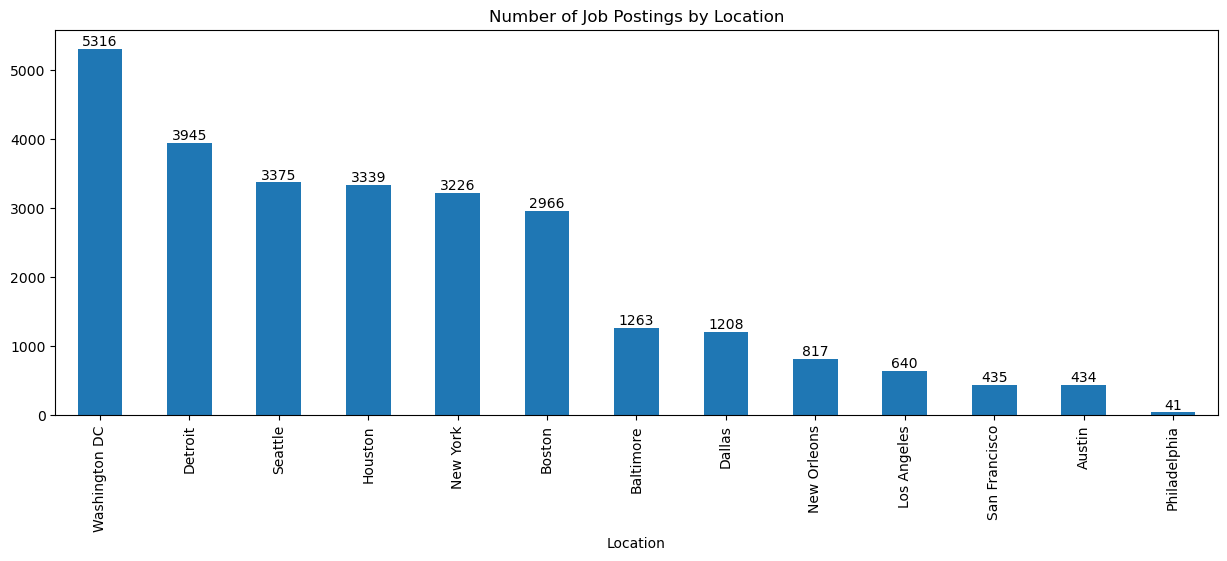

In [8]:
total_cities_df.sort_values('count',inplace=True,ascending=False)
ax = total_cities_df.plot.bar(y='count',x='Location',legend=False,figsize=[15,5],title='Number of Job Postings by Location')
ax.bar_label(ax.containers[0])